In [1]:
# Anaconda Navigator에서 party 설치 
library(party)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [3]:
# Sampling
set.seed(1234)
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [20]:
# 70%만 샘플링 
samp <- createDataPartition(iris$Species,p=0.7,list=F)
samp
nrow(samp)

Resample1
1
2
3
4
7
8
9
13
16
17


[1] 105

In [6]:
# 학습용
data.tr <- iris[samp,]
#테스트용 
data.test <- iris[-samp,]

In [7]:
#학습시키기
model.ctree <- ctree(Species ~., data=data.tr)

In [9]:
# 문제 및 정답 만들기 
x <- subset(data.test,select=-Species)
y <- data.test$Species

In [11]:
#검증하기 
pred <- predict(model.ctree,x)
pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] virginica  versicolor versicolor virginica  virginica  versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [12]:
# 예측력과 오분류표 
mean(pred == y)
table(pred,y)

[1] 0.9333333

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

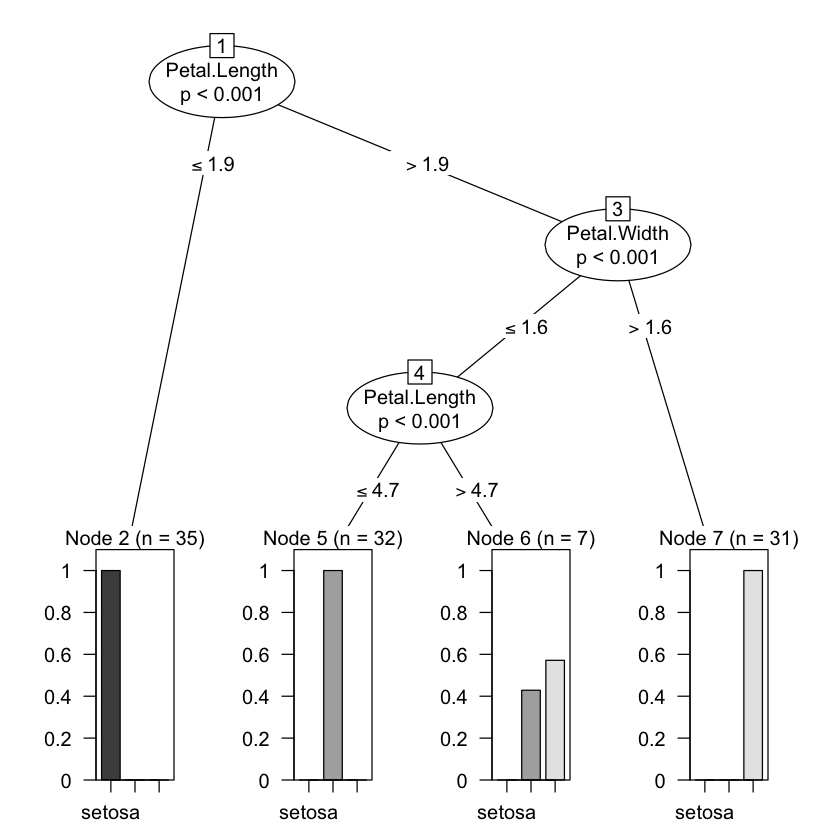

In [14]:
plot(model.ctree)